In [1]:
import pandas as pd

In [2]:
pokemon = pd.read_csv('C:/Users/SAMSUNG/desktop/data-files/pokemon.csv')

In [9]:
# 'ith parse_dates, I can use dates as row labels
# Note: index_col=False can be used to force pandas to not use the first column as the index, e.g. 
# when you have a malformed file with delimiters at the end of each line
air_quality = pd.read_csv("C:/Users/SAMSUNG/desktop/data-files/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


<AxesSubplot:xlabel='datetime'>

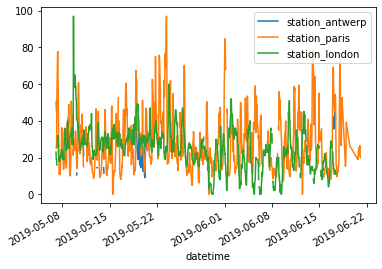

In [10]:
air_quality.plot()

Creating a column with information present


In [11]:
# If we assume temperature of 25 degrees Celsius and pressure of 1013 hPa, the conversion factor is 1.882

# no need to loop at all, pandas handles it element wise

air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [12]:
# creating a new column with the values derived from the info I have

air_quality["ratio_paris_antwerp"] = ( air_quality["station_paris"] / air_quality["station_antwerp"] )

air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [13]:
# renaming the data columns

air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


The **rename()** function can be used for both row labels and column labels. Provide a dictionary with the keys the current names and the values the new names to update the corresponding names.

In [14]:
# Using lowercase in columns as a mapping example

air_quality_renamed = air_quality_renamed.rename(columns=str.lower)

air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN




    Create a new column by assigning the output to the DataFrame with a new column name in between the [].

    Operations are element-wise, no need to loop over rows.

    Use rename with a dictionary or function to rename row labels or column names.
